#Handwritten Data Recognition using CNN
Handwritten digit recognition is a prevalent multiclass classification problem usually built into the software of mobile banking applications, as well as more traditional automated teller machines, to give users the ability to automatically deposit paper checks.Here each class of data consists of (images of) several handwritten versions of a single digit in the range 0 − 9, giving a total of ten classes. Handwriting character recognition has become a common area of research because of developments in technology such as handwriting recording tools and powerful mobile computers (Elleuch, Maalej, & Kherallah, 2016). Because handwriting is highly dependent on the writer, however, it is challenging to develop a highly reliable recognition system that recognizes every handwritten character input to an application.

#Dataset-MNIST
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets.The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments.Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.
The MNIST database contains 60,000 training images and 10,000 testing images.

#Import Libraries

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential
from keras.datasets import mnist


#Data Loading

In [9]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()


In [10]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [11]:
x_train_flattened=x_train.reshape(60000,28,28,1).astype('float32')
x_test_flattened=x_test.reshape(10000,28,28,1).astype('float32')

In [12]:
x_train_flattened=x_train_flattened/255
x_test_flattened=x_test_flattened/255

In [13]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [14]:
x_train_flattened.shape

(60000, 28, 28, 1)

#Model Building
Sequential Model − Sequential model is basically a linear composition of Keras Layers. Sequential model is easy, minimal as well as has the ability to represent nearly all available neural networks.

In [15]:
model=Sequential()

In this model 2 convolution and maxpooling layers are added.Then after flattening we send the maxpooled layer output into 2 dense layer.We choose relu as activation function in convolution as well as one dense layer. The Output layer have softmax as their activation function.

In [16]:
model.add(Conv2D(input_shape=(28,28,1),
                 filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(activation='relu',
                 filters=64,
                 kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))


In [17]:
'''Checking the model summary'''
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [18]:
'''Compiling the model by using adam optimizer'''
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
y_train.shape,x_train_flattened.shape

((60000, 10), (60000, 28, 28, 1))

In [20]:
'''Fitting the model'''
model.fit(x_train_flattened,
          y_train,
          batch_size=128,
          epochs=10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 47s 99ms/step - loss: 0.2061 - accuracy: 0.9398
Epoch 2/10
469/469 [==============================] - 49s 106ms/step - loss: 0.0569 - accuracy: 0.9826
Epoch 3/10
469/469 [==============================] - 53s 113ms/step - loss: 0.0393 - accuracy: 0.9877
Epoch 4/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0284 - accuracy: 0.9913
Epoch 5/10
469/469 [==============================] - 46s 99ms/step - loss: 0.0233 - accuracy: 0.9924
Epoch 6/10
469/469 [==============================] - 51s 110ms/step - loss: 0.0185 - accuracy: 0.9942
Epoch 7/10
469/469 [==============================] - 46s 97ms/step - loss: 0.0138 - accuracy: 0.9959
Epoch 8/10
469/469 [==============================] - 55s 116ms/step - loss: 0.0118 - accuracy: 0.9963
Epoch 9/10
469/469 [==============================] - 46s 97ms/step - loss: 0.0086 - accuracy: 0.9973
Epoch 10/10
469/469 [==============================] - 48s 103ms/step - loss: 

#Model Evaluation

In [21]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0363 - accuracy: 0.9897


[0.03627074882388115, 0.9897000193595886]

In [22]:
y_pred=model.predict(x_test_flattened)

313/313 [==============================] - 6s 18ms/step


In [23]:
print(y_pred)

[[4.82016499e-13 3.54804068e-11 6.27413899e-09 ... 9.99988377e-01
  4.68208583e-10 9.80548864e-10]
 [5.03348127e-11 1.49934232e-09 9.99999940e-01 ... 7.12053680e-13
  5.57318185e-11 8.33090531e-15]
 [2.56323730e-11 9.99996245e-01 2.85515722e-09 ... 2.86864832e-07
  8.35966318e-09 3.83667681e-11]
 ...
 [1.63737326e-19 9.11562492e-14 6.24079423e-16 ... 2.37285937e-11
  3.15467867e-13 3.16087330e-11]
 [8.96360330e-12 1.11394641e-14 3.66861977e-13 ... 1.06705314e-13
  5.44908460e-07 1.80145354e-13]
 [8.62916849e-10 1.10073615e-12 3.41816597e-09 ... 1.88151098e-17
  1.21591481e-09 1.09128722e-12]]


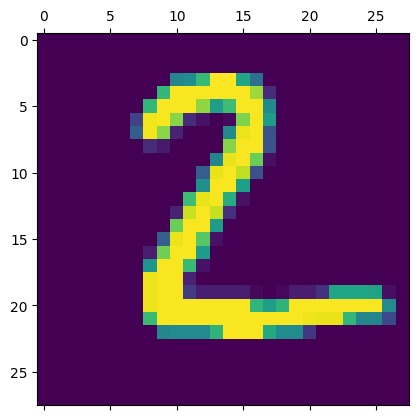

In [31]:
plt.matshow(x_test[1])

In [32]:
np.argmax(y_pred[1])

2

#Conclusion
By the help of cnn we build a model and achieved accuracy of 98.76%


